# Natural Language Processing Data Exploration Exercises
***

#### Spam Data

- Load the spam data set.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from sklearn.cluster import KMeans
import numpy as np

import acquire
import prepare

# downloads the vader lexicon
#nltk.download('vader_lexicon')

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [3]:
#Load data from spam_db

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [5]:
# combine all messages in single string by label

ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

### bigram: combinations of 2 words
 - Represent text as combinations of 2 words

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

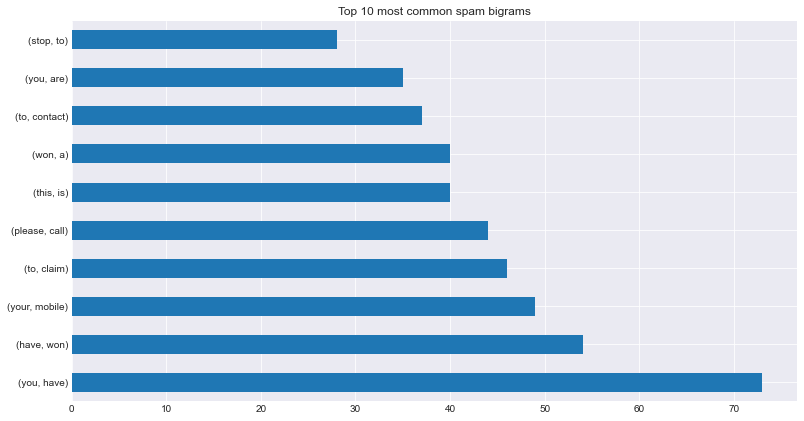

In [6]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams')

Text(0.5, 1.0, 'Top 10 most common ham bigrams')

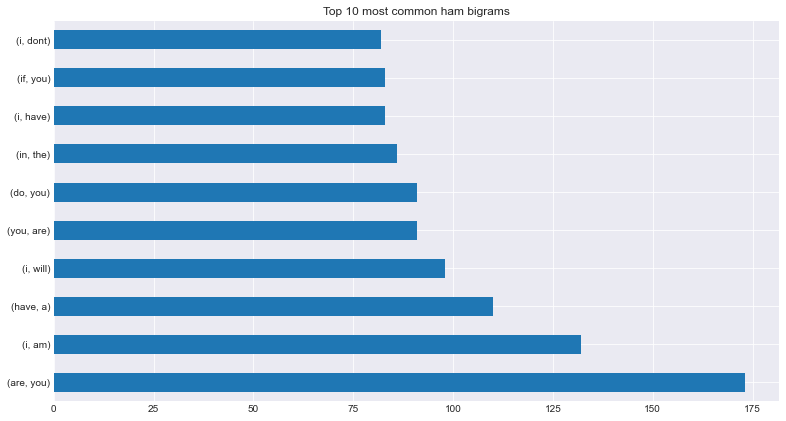

In [7]:
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham bigrams')

#### Word Cloud

(-0.5, 799.5, 599.5, -0.5)

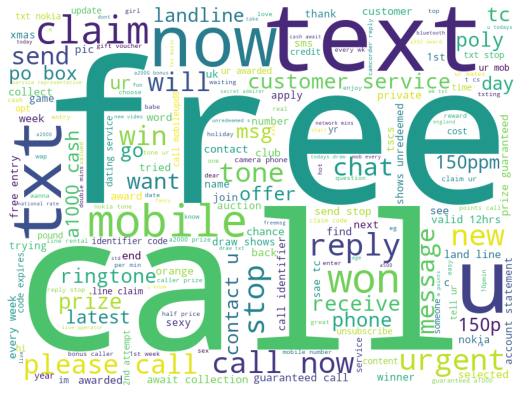

In [8]:
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

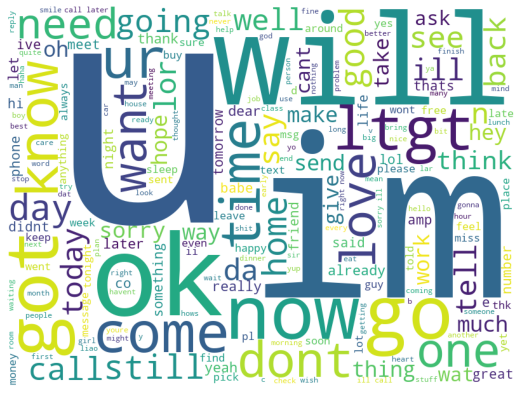

In [9]:
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(ham_words)
plt.imshow(img)
plt.axis('off')

- Is there any overlap in the bigrams for the spam data and the ham data?
     - yes: you are

- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

Text(0.5, 1.0, 'Top 10 most common spam trigrams')

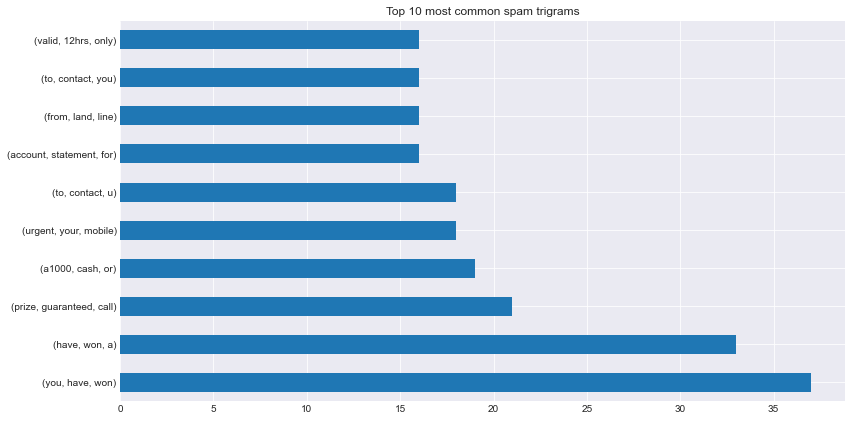

In [10]:
pd.Series(nltk.trigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam trigrams')

Text(0.5, 1.0, 'Top 10 most common ham trigrams')

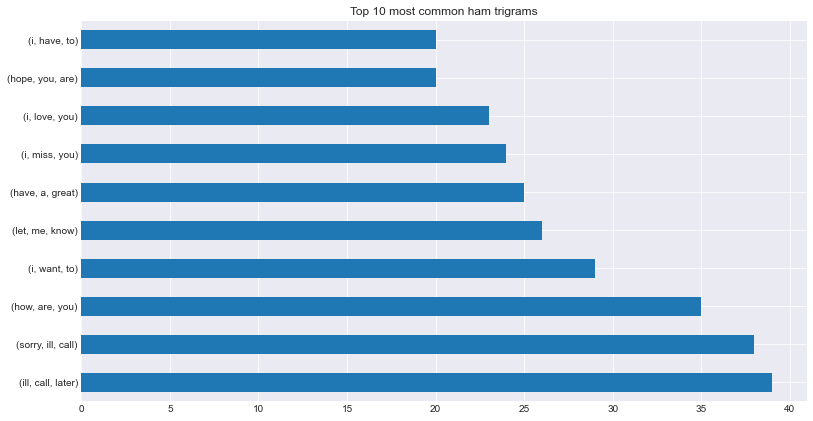

In [11]:
pd.Series(nltk.trigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham trigrams')

#### 2.) Explore the blog articles using the techniques discussed in the exploration lesson.

In [12]:
#Check message length and word count in spam and ham

# add two new columns 'message_length' and 'word_count'

df['message_length'] = df.text.apply(len)

df['word_count'] = df.text.apply(clean).apply(str.split).apply(len)

df.head()

,label,text,message_length,word_count
id,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13


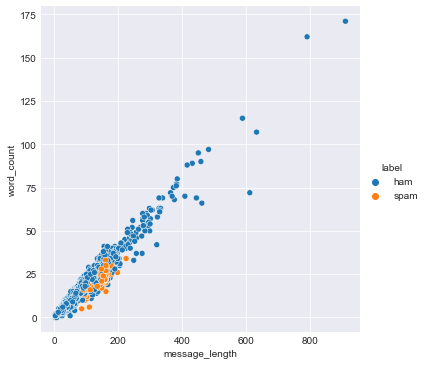

In [13]:
sns.relplot(data = df, x = 'message_length', y = 'word_count', hue = 'label')

In [14]:
df.groupby('label').message_length.agg(['mean', 'median'])

,mean,median
label,,
ham,71.023627,52
spam,138.866131,149


In [15]:
#Check out sentiment in spam and ham

import nltk.sentiment

sia = nltk.sentiment.SentimentIntensityAnalyzer()


In [16]:
df['sentiment'] = df.text.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df

,label,text,message_length,word_count,sentiment
id,,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,0.6249
1,ham,Ok lar... Joking wif u oni...,29,6,0.4767
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,0.7964
3,ham,U dun say so early hor... U c already then say...,49,11,0.0000
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,-0.1027
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,30,0.8805
5568,ham,Will Ì_ b going to esplanade fr home?,37,8,0.0000
5569,ham,"Pity, * was in mood for that. So...any other s...",57,9,-0.2960


In [17]:
# is the mean and median values of sentiment score different for ham vs spam?
df.groupby('label').sentiment.agg(['mean','median'])

,mean,median
label,,
ham,0.152218,0.0000
spam,0.436018,0.6107


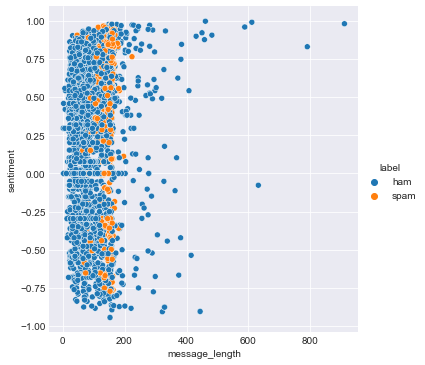

In [18]:
#plot message_length vs sentiment and hue by label
sns.relplot(data = df, x = 'message_length', y = 'sentiment', hue = 'label')

<AxesSubplot:xlabel='sentiment', ylabel='Density'>

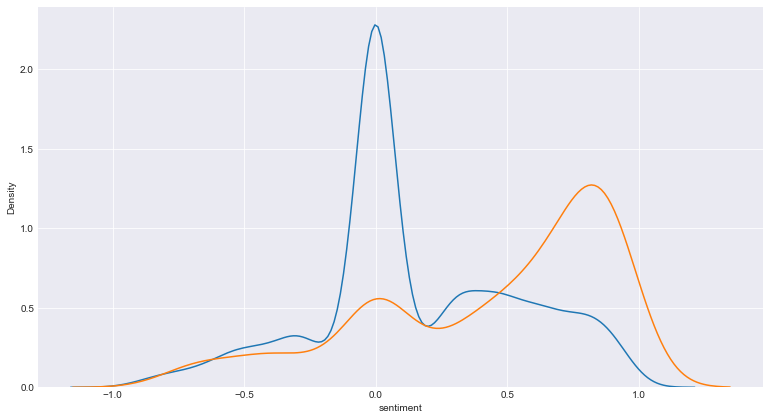

In [19]:
# is the distribution for sentiment different for ham vs spam
sns.kdeplot(df[df.label == 'ham'].sentiment, label = 'ham')
sns.kdeplot(df[df.label == 'spam'].sentiment, label = 'spam')

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='message_length', ylabel='sentiment'>

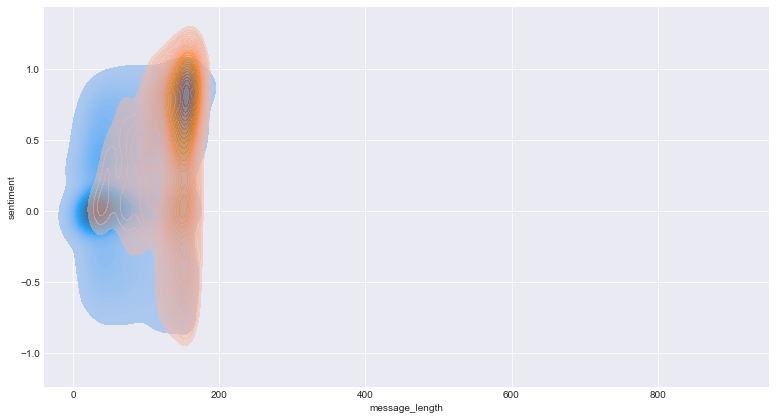

In [20]:
# Bivariate KDE plot for message_length vs sentiment score 
sns.kdeplot(df[df.label == 'ham'].message_length,df[df.label == 'ham'].sentiment, levels = 30, shade = True )
sns.kdeplot(df[df.label == 'spam'].message_length,df[df.label == 'spam'].sentiment, levels = 30, shade = True, alpha = 0.5 )

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 cat
 best
 climbing
 ninja
 ve
 photo
 taken
 belly
 merley
 kitten
Cluster 1:
 google
 feedback
 map
 app
 impressed
 incredible
 translate
 key
 extension
 chrome


Prediction
[1]
[0]


In [24]:
#Explore blog articles

df = acquire.get_blogs()
df.head()

,title,date,category,content
0,Codeup’s Data Science Career Accelerator is Here!,"Sep 30, 2018",Data Science,The rumors are true! The time has arrived. Cod...
1,Data Science Myths,"Oct 31, 2018",Data Science,By Dimitri Antoniou and Maggie Giust Data Scie...
2,Data Science VS Data Analytics: What’s The Dif...,"Oct 17, 2018",Data Science,"By Dimitri Antoniou A week ago, Codeup launche..."
3,10 Tips to Crush It at the SA Tech Job Fair,"Aug 14, 2018",Tips for Prospective Students,The third bi-annual San Antonio Tech Job Fair ...
4,Competitor Bootcamps Are Closing. Is the Model...,"Aug 14, 2018",Codeup News,"In recent news, DevBootcamp and The Iron Yar..."


In [25]:
df.columns

Index(['title', 'date', 'category', 'content'], dtype='object')

In [26]:
# combine all messages in single string by label

blog_words = prepare.basic_clean(str(df.content))

Text(0.5, 1.0, 'Top 10 most common blog bigrams')

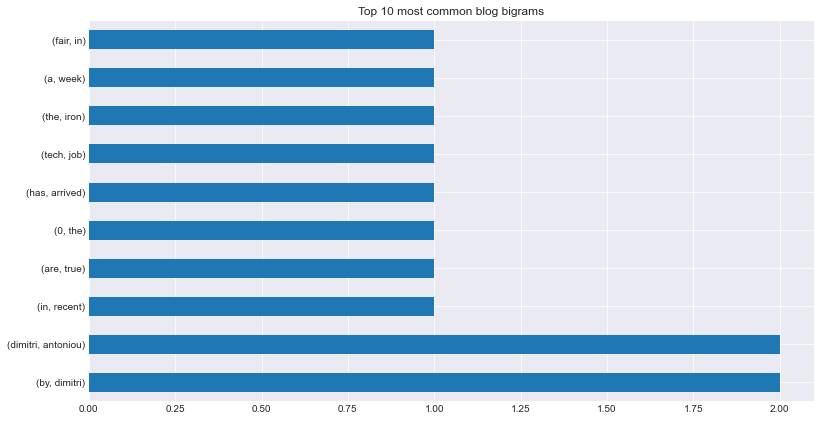

In [27]:
#N_grams
pd.Series(nltk.bigrams(blog_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common blog bigrams')

Text(0.5, 1.0, 'Top 10 most common blog trigrams')

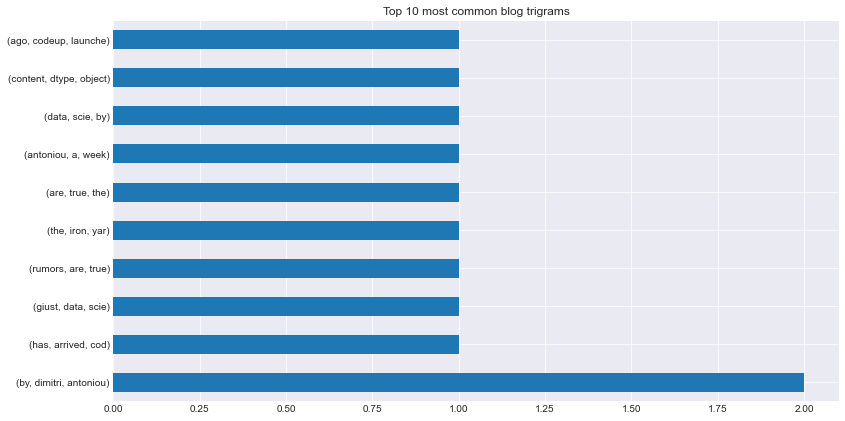

In [28]:
pd.Series(nltk.trigrams(blog_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common blog trigrams')

(-0.5, 799.5, 599.5, -0.5)

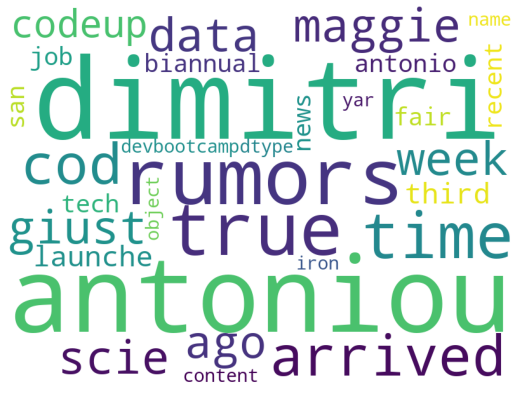

In [29]:
#Word cloud of blog words
img = WordCloud(background_color='white', width=800, height=600).generate(blog_words)
plt.imshow(img)
plt.axis('off')

In [30]:
df['sentiment'] = df.content.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df

,title,date,category,content,sentiment
0,Codeup’s Data Science Career Accelerator is Here!,"Sep 30, 2018",Data Science,The rumors are true! The time has arrived. Cod...,0.9844
1,Data Science Myths,"Oct 31, 2018",Data Science,By Dimitri Antoniou and Maggie Giust Data Scie...,0.9916
2,Data Science VS Data Analytics: What’s The Dif...,"Oct 17, 2018",Data Science,"By Dimitri Antoniou A week ago, Codeup launche...",0.9222
3,10 Tips to Crush It at the SA Tech Job Fair,"Aug 14, 2018",Tips for Prospective Students,The third bi-annual San Antonio Tech Job Fair ...,0.9861
4,Competitor Bootcamps Are Closing. Is the Model...,"Aug 14, 2018",Codeup News,"In recent news, DevBootcamp and The Iron Yar...",-0.4033


#### 3.) Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [34]:
#Explore the news articles

df = acquire.get_news()
df.head()

,headline,publish_time,category,content
0,Nykaa investor Katrina Kaif lights ceremonial ...,01:52 pm,Business,"Katrina Kaif, who revealed last year that she'..."
1,$199 billion wiped off Tesla's market cap in 2...,09:48 am,Business,Billionaire Elon Musk-led Tesla has lost $199 ...
2,Apple CEO Tim Cook reveals he owns cryptocurre...,01:53 pm,Business,Apple CEO Tim Cook revealed that he personally...
3,Elon Musk loses record $50 billion in 2 days,08:48 am,Business,World's richest person Elon Musk has lost $50 ...
4,Go on long holiday: Zerodha Co-founder tells v...,04:53 pm,Business,"After Nykaa made its market debut, Zerodha Co-..."


In [35]:
df.columns

Index(['headline', 'publish_time', 'category', 'content'], dtype='object')

In [36]:
# combine all messages in single string by label

news_words = prepare.basic_clean(str(df.content))

Text(0.5, 1.0, 'Top 10 most common news bigrams')

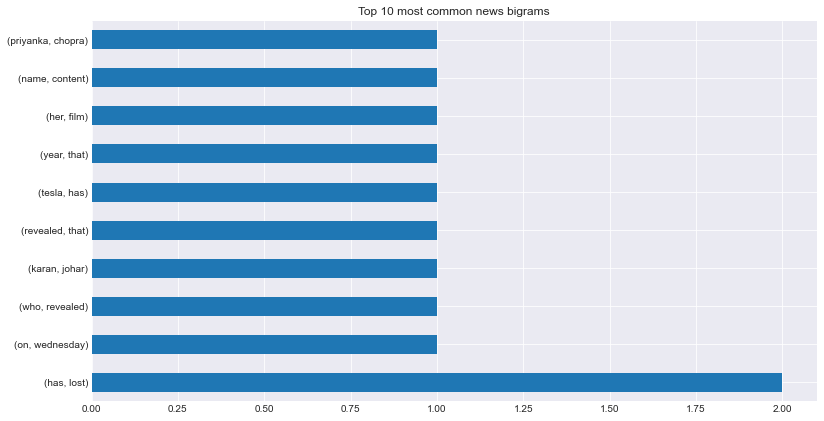

In [37]:
#N_grams
pd.Series(nltk.bigrams(news_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common news bigrams')

Text(0.5, 1.0, 'Top 10 most common news trigrams')

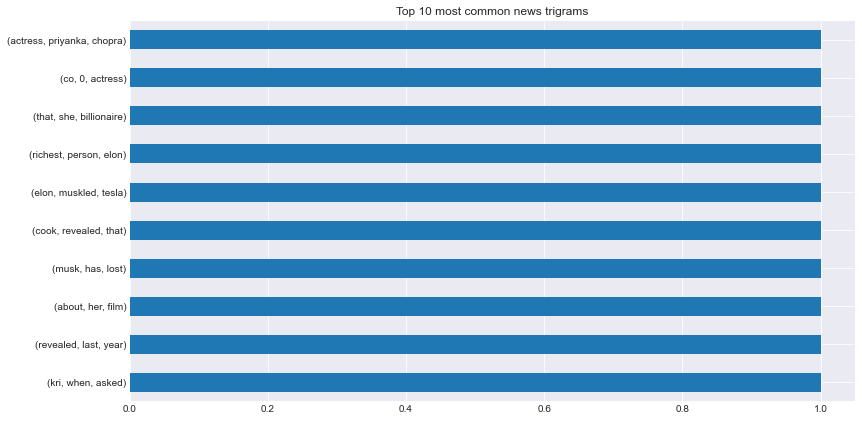

In [38]:
pd.Series(nltk.trigrams(news_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common news trigrams')

(-0.5, 799.5, 599.5, -0.5)

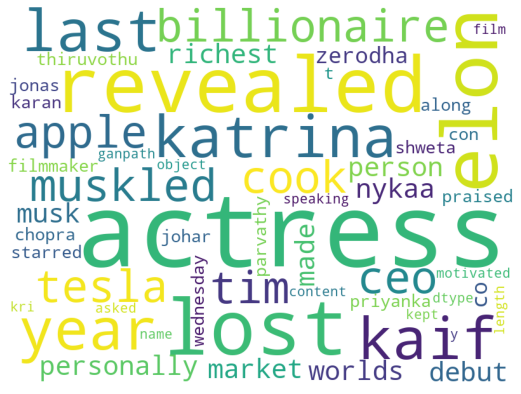

In [39]:
#Word cloud of blog words
img = WordCloud(background_color='white', width=800, height=600).generate(news_words)
plt.imshow(img)
plt.axis('off')

In [40]:
df['sentiment'] = df.content.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df

,headline,publish_time,category,content,sentiment
0,Nykaa investor Katrina Kaif lights ceremonial ...,01:52 pm,Business,"Katrina Kaif, who revealed last year that she'...",0.9169
1,$199 billion wiped off Tesla's market cap in 2...,09:48 am,Business,Billionaire Elon Musk-led Tesla has lost $199 ...,0.5859
2,Apple CEO Tim Cook reveals he owns cryptocurre...,01:53 pm,Business,Apple CEO Tim Cook revealed that he personally...,0.1027
3,Elon Musk loses record $50 billion in 2 days,08:48 am,Business,World's richest person Elon Musk has lost $50 ...,0.7506
4,Go on long holiday: Zerodha Co-founder tells v...,04:53 pm,Business,"After Nykaa made its market debut, Zerodha Co-...",0.8807
...,...,...,...,...,...
20,You're an absolute vision: Priyanka congratula...,02:15 pm,Entertainment,Actress Priyanka Chopra Jonas on Wednesday con...,0.9522
21,"Met Irrfan at award show, he picked up my nose...",04:13 pm,Entertainment,"Actress Parvathy Thiruvothu, who starred along...",0.9287
22,Super hook: Karan praises Palak Tiwari for her...,05:05 pm,Entertainment,Filmmaker Karan Johar praised actress Shweta T...,0.9389
23,I get to do stunts and ride a bike: Kriti on h...,05:26 pm,Entertainment,"Speaking about her film 'Ganpath', actress Kri...",0.7351
